# <center> Ridge Regression with sklearn

## Fitting Ridge Regression with sklearn module

- To perform **Ridge regression** you use the `Ridge` from `sklearn.linear_model` submodule. 

- **Ridge Regression** options: 
    - **alpha**: the regularization strength by which each parameter will be shrunk. (Default to 1)
    - **fit_intercept**: specify whether to fit the intercept. If both the target and features are centered, this should be set to **False**.
    - **normalize**: to specify whether to normalize the features before regressing. (You can set either fit_intercept to True, or normalize to True but not both).

The left options are left for to discover them.

After fitting ridge regression, you may wish to see the estimated coefficients. The coefficients are attributes of ridge regression object and can be retrieved using `r_obj.coef_`.

**Syntax**:
```python

# Import the Ridge
from sklearn.linear_model import Ridge

# Instantiate a ridge object
r_obj = Ridge(alpha = <a number or a range>,
          fit_intercept = True (False by default),
          normalize = True (False by default))

# Fit the ridge regression
r_obj.fit(X, y)

# Retrieve the coefficient attributes
r_obj.coef_

# Run help for more about ridge
help(Ridge)
#or 
?Ridge
```

## Setting Up the Workspace 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Working data

In [2]:
from sklearn.datasets import load_boston
X = load_boston().data
y = load_boston().target

## Importing Ridge Regression submodule

In [3]:
# Import Ridge regression from sklearn.linear_model
from sklearn.linear_model import Ridge

In [4]:
# Create Ridge Regression object with the default parameters
r = Ridge()

#### Ridge Regression Parameters

It is good practice to learn about the parameters of any model you are about to use. Doing so by using `model_obj.get_params()`.

In [5]:
# get the parameters of ridge regression
r.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

#### Fiting Ridge Regression

Fitting a ridge regression simply performed by calling a `fit()` function on `ridge_obj`.

In [6]:
## Fit the ridge regression
r.fit(X, y)

Ridge()

#### Accessing the intercept and the coefficients

  - Accessing the intercept if fitted is done using the attribute `intercept_`
  - Accessing fitted coefficients is done using the attribute `coef_`

In [7]:
## Access the intercept
r.intercept_

31.597669818273985

In [8]:
## Access the coefficients
r.coef_

array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
       -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
        2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
       -5.33343225e-01])

### Linear Regression and Ridge Regression Comparision 01

- You might want to compare the coefficients of linear and ridge regression to see the difference. Here, we are doing the comparison using the defaults of ridge regression, which is not the best way. However, we will try different ways.

#### Fitting Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression()

In [10]:
## Linear Regression coefficients
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [11]:
## Linear Regression intercepabst
lreg.intercept_

36.459488385089855

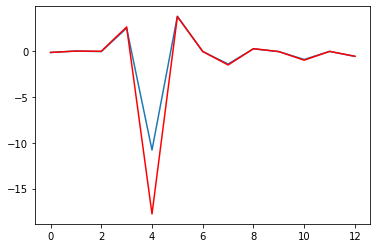

In [12]:
# It is better to plot the coefficient to see the difference
plt.plot(r.coef_)
plt.plot(lreg.coef_, c = 'red')
plt.show()

In [13]:
## See the difference between the lowest coefficient values in both regression
print(np.min(r.coef_), np.min(lreg.coef_))

-10.777014648164528 -17.766611228299986


Even, with $\alpha = 0$ there is a difference between the two coefficients.

#### Comparing Linear and Ridge Regressions 02

This time we will center the variables before fitting the ridge regression, and plot the coefficients again. 

In [14]:
# Set fit_intercept to False
r_cent = Ridge(fit_intercept=False)

# Fit ridge regression
r_cent.fit(X, y)

Ridge(fit_intercept=False)

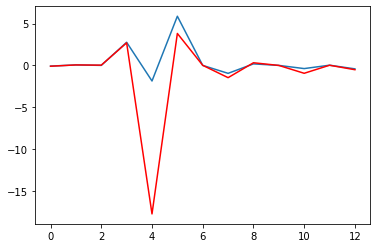

In [15]:
## Plot the coefficients
plt.plot(r_cent.coef_)
plt.plot(lreg.coef_, c = 'red')
plt.show()

We see from the plot that after centring the data, the largest value of ridge regression coefficient in absolute value has shrunk substantially.

## Fitting Ridge Regression with a Range of Alpha Values

- We are going to give the hyper parameter $\alpha$ a set of values and fit ridge regression to show the effect of __regularization__.

- To give a range of values to $\alpha$, we use the `logspace` function from `numpy`. This function gives an array of evenly spaced values on log scale (base 10 by defaut).

**Syntax**:

```python
# Give a range of value 
alpha_vals = np.logspace(start, stop, number)

# Create an empty list
r_coefs = []

# Fit ridge regression using a for loop

for alpha in alpha_vals:
        r_reg = Ridge(alpha = alpha, fit_intercept = True)
        r_reg.fit(X, y)
        # append coefs to coef list
        r_coef.append(r_reg.coef_)
```
After fitting a model for each $\alpha$ value, plot the coefficients

### Practice Fitting Ridge Regression 

In [16]:
# Initialize alpha values and an empty list for coefficients
alpha_space = np.logspace(-5, 3, 20)
ridge_coefs = []

In [17]:
for alpha in alpha_space:
    r = Ridge(alpha = alpha, normalize=True)
    r.fit(X, y)
    ridge_coefs.append(r.coef_)
    

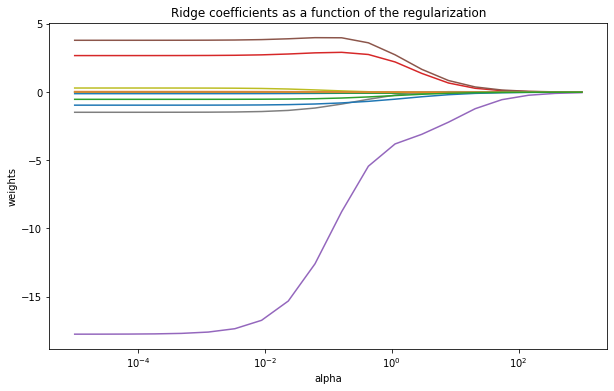

In [18]:
## Plot the coefs against alpha values
plt.figure(figsize= (10, 6))
ax = plt.gca()

ax.plot(alpha_space, ridge_coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")

plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

As $\alpha$ gets bigger, the coefficient shrink towards zero. 

## Ridge Regression with K-Fold Cross Validation

 - As a first practice of performing __ridge regression__ with cross validation,  we are going to set a range of value for $\alpha$ and fit the ridge model for each value. Recall that `cross_val_score` function compute the $R^{2}$ for linear problems by default. Thus, we aim to see how this metric changes according to each $\alpha$ value.
 
 - To plot the results, we difine a function below.

### Performing Ridge Regression Steps

To perform ridge regression, follow these steps shown in the syntax below:

```python
# 1. Import Ridge from linear sklearn.linear_model
from sklearn.linear_model import Ridge

# 2. Import cross_val_score
from sklearn.model_selection import cross_val_score

# 3. Define alpha range values, and lists to store results

alpha_space = np.logspace(-5, 2, 50)
ridge_scores = []
ridge_scores_std = []

# Perform a foor loop for computing the score over the range values of alpha

for alpha in alpha_space:

    # Specify the alpha value to use
    ridge.alpha = alpha
    
    # Perform 10-fold CV 
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
```

### Plotting Function
We create a function to plot the results. Here is the source code:

In [19]:
def display_plot(cv_scores, cv_scores_std, k_cv, hline_func):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(k_cv)
    
    ax.fill_between(alpha_space,
                    cv_scores + std_error,
                    cv_scores - std_error, 
                    alpha=0.15)
    
    ax.set_ylabel('CV Score +\- Std Error')
    ax.set_xlabel('Alpha')
    
    ax.axhline(hline_func(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

### Importing the Modules

In [20]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

### Setting the data

In [21]:
X = load_boston().data
y = load_boston().target

In [22]:
# Initialize an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 2, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

In [23]:
# Perform a for loop
for alpha in alpha_space:
    ridge.alpha = alpha
    
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))

    ridge_scores_std.append(np.std(ridge_cv_scores))

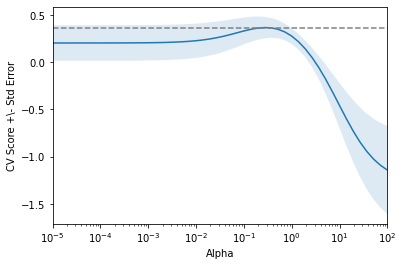

In [24]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std, 10, np.max)

## Scoring Ridge Regression with Mean Squared Error

In [25]:
from sklearn.metrics import mean_squared_error, make_scorer

In [26]:
# Initialize an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 2, 50)
ridge_scores = []
ridge_scores_std = []

# make mse scorer
mse = make_scorer(mean_squared_error)

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use
    ridge.alpha = alpha
    
    # Perform 10-fold CV 
    ridge_cv_scores = cross_val_score(ridge, X, y, 
                                      cv = 10,
                                     scoring = mse)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

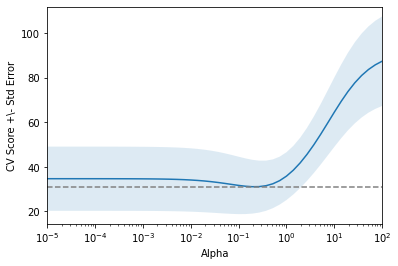

In [27]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std, 10, np.min)

## Ridge Hyper Parameter Tuning with GridSearch

In [28]:
X = load_boston().data
y = load_boston().target

In [29]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [30]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-5, 2, 25)
param_grid = {'alpha': alpha_space}

In [31]:
# Instantiate ridge regression 
r_reg = Ridge(fit_intercept=False)

In [32]:
# Instantiate GridSearchCV object with 5 folds
rreg_cv = GridSearchCV(r_reg, 
                       param_grid = param_grid, 
                       cv = 5)

In [33]:
# Fit it to the data
rreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameter: {}".format(rreg_cv.best_params_)) 
print("Ridge Regression Best score is {}".format(rreg_cv.best_score_))


Tuned Ridge Regression Parameter: {'alpha': 13.33521432163324}
Ridge Regression Best score is 0.43673916915137234


## Ridge Hyper Parameter Tuning with RandomizedSearch

In [34]:
# Import RandomizeSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Setup the distribution grid grid
alpha_space = np.logspace(-5, 2, 25)
param_dist = {'alpha': alpha_space}

In [36]:
# Instantiate ridge regression 
rid_reg = Ridge(fit_intercept=False)

In [37]:
# Instantiate RandomizedSearchCV object with 5 folds
rid_reg_cv = RandomizedSearchCV(rid_reg, 
                          param_distributions= param_dist, 
                          cv = 5)

In [38]:
# Fit it to the data
rid_reg_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=Ridge(fit_intercept=False),
                   param_distributions={'alpha': array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02])})

In [39]:
# Print the tuned parameters and score
print("Tuned Ridge regression Parameter: {}".format(rid_reg_cv.best_params_))
print("Ridge regression best score is {}".format(rid_reg_cv.best_score_))

Tuned Ridge regression Parameter: {'alpha': 0.4641588833612782}
Ridge regression best score is 0.4148046270558532


## Ridge Regression with RidgeCV 

- `RidgeCV` implements ridge regression with built-in cross-validation of the alpha parameter. 

- `RidgeCV` has the same method as **grid search CV** but it applies a **Leave-One-Out Cross-Validation** technique. 

**Syntax**:
```python
# Import RidgeCV
from sklearn.linear_model import ridgeCV
```

In [40]:
# Import RidgeCV
from sklearn.linear_model import RidgeCV

In [41]:
X = load_boston().data
y = load_boston().target

In [42]:
alpha_space = np.logspace(-5, 2, 25)

In [43]:
r_reg_loocv = RidgeCV(alphas = alpha_space, fit_intercept=False)

In [44]:
r_reg_loocv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02]),
        fit_intercept=False)

In [45]:
r_reg_loocv.best_score_

-25.952637828855917

In [46]:
r_reg_loocv.alpha_

6.812920690579622

### Cross Validation with RidgeCV

 - We can perform K-fold cross validation using `RidgeCV` by setting `cv` to a number of folds `k`.  

In [47]:
# Fit 5-fold cross validation using RidgeCV
r_reg_cv = RidgeCV(alphas = alpha_space,
                   fit_intercept=False,
                  cv = 5)

In [48]:
r_reg_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02]),
        cv=5, fit_intercept=False)

In [49]:
# Print the tuned parameter and score
print("Tuned Ridge regression Parameter alpha is: {:.4f}".format(r_reg_cv.alpha_))
print("Ridge regression best score is: {:.4f}".format(r_reg_cv.best_score_))

Tuned Ridge regression Parameter alpha is: 13.3352
Ridge regression best score is: 0.4367


# Final Evaluation with Hold out Set

## Ridge Regression with Cross Validation and Train/Test Splitting 

  - **Hold-out** set evaluation means doing a final assessment on a set of values the model has never seen before. 
  
You might have asked yourself, even with cross validation. The answer is **Yes**.

If you enough data, and you want to write your final report, you may have to test your model on this **hold out set**, because the score of your model on this set is exactly how it behave in the real world. 

Another reason why you want to keep a **subset of data** is to give an accurate picture of your model. Suppose you have used all your data for cross validation, then you don't have the possibility to test how your model will behave on __unseen data__. 

### Perfoming Final Evaluation: 

We have already seen how to split the data, so we split the data into train an test sets, fit the model on train set then evaluate it on the test set
  

In [50]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [51]:
X = load_boston().data
y = load_boston().target

In [52]:
# Split the data
X_train, X_test, y_train, y_test =\
                train_test_split(X, y, 
                    test_size=0.20, 
                        random_state=10123)

In [53]:
## Fitting Ridge Regression

alpha_space = np.logspace(-5, 2, 25)
param_grid = {'alpha': alpha_space}

# Create Regression object
ridge_final = Ridge(fit_intercept=False)

# Tune to find the best parameter
ridge_final_cv = GridSearchCV(ridge_final, 
                          param_grid = param_grid, 
                          cv = 5, 
                          refit = True)

In [54]:
# Fit the model on the train set
ridge_final_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(fit_intercept=False),
             param_grid={'alpha': array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02])})

In [55]:
# Make Predictions
preds = ridge_final_cv.predict(X_test)

In [56]:
# Score the results
print("The R^2 of the ridge regression is: {:0.4f}".\
      format(ridge_final_cv.score(X_test, y_test)))

The R^2 of the ridge regression is: 0.7758


In [57]:
# Score the model with RMSE 
print("The RMSE is: {:.4f}".format(np.sqrt(mean_squared_error(preds, y_test))))

The RMSE is: 4.3806


## Best of Luck Learning